In [1]:
import numpy as np
from pystoned import CNLS
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS, OPT_LOCAL

In [2]:
from matplotlib import pyplot as plt

### CNLS on Synthetic data

Optimizing locally.
Estimating the additive model locally with mosek solver.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : QO (quadratic optimization problem)
  Constraints            : 2500            
  Cones                  : 0               
  Scalar variables       : 200             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformulation started.
Quadratic to conic reformulation terminated. Time: 0.00    
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 50
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time              

The optimal objective value is: 1.4884424967686471


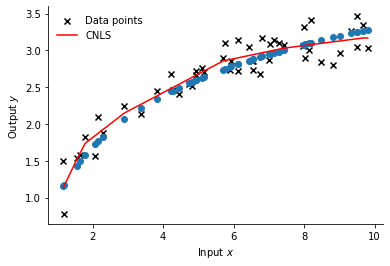

In [24]:
import numpy as np
from pystoned import CNLS
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS, OPT_LOCAL
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.sort(np.random.uniform(low=1, high=10, size=50))
u = np.random.normal(loc=0, scale=0.2, size=50)
y_true = 1 + np.log(x)
y = y_true - u

model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
model.optimize(OPT_LOCAL)
model.display_residual()
plot2d(model, x_select=0, label_name="CNLS", fig_name='CNLS_frontier')
plt.scatter(x,y_true, label='True value')

optimal_value = np.sum(model.get_residual()**2)
print('The optimal objective value is:', optimal_value)

### CNLS - Estimating energy production function

Optimizing locally.
Estimating the additive model locally with mosek solver.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : QO (quadratic optimization problem)
  Constraints            : 7921            
  Cones                  : 0               
  Scalar variables       : 445             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformulation started.
Quadratic to conic reformulation terminated. Time: 0.00    
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 89
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time              

NameError: name 'np' is not defined

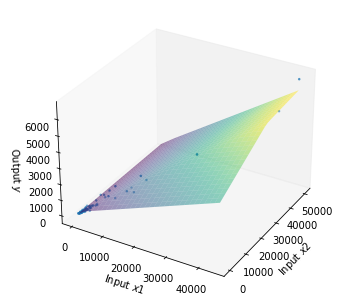

In [1]:
from pystoned import CNLS
from pystoned.constant import CET_ADDI, FUN_PROD, OPT_LOCAL, RTS_VRS
from pystoned.dataset import load_Finnish_electricity_firm
from pystoned.plot import plot3d

data = load_Finnish_electricity_firm(x_select=['OPEX', 'CAPEX'],
                                      y_select=['Energy'])

model = CNLS.CNLS(y=data.y, x=data.x, z=None,
                    cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)

model.optimize(OPT_LOCAL)
model.display_alpha()
model.display_beta()
model.display_residual()

plot3d(model, x_select_1=0, x_select_2=1, fig_name='CNLS_frontier')
optimal_value = np.sum(model.get_residual()**2)
print('The optimal objective value is:', optimal_value)
